In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
diab_data = pd.read_csv('data/diabetes_data.csv')
display(diab_data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female
...,...,...,...,...,...,...,...,...,...,...
773,6,103,72,32,190,37.7,0.324,55,0,Female
774,1,71,48,18,76,20.4,0.323,22,0,Female
775,0,117,0,0,0,33.8,0.932,44,0,Female
776,4,154,72,29,126,31.3,0.338,37,0,Female


* Pregnancies — количество беременностей
* Glucose — концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе
* BloodPressure — диастолическое артериальное давление (мм рт. ст.)
* SkinThickness — толщина кожной складки трицепса (мм)
* Insulin — двухчасовой сывороточный инсулин (ме Ед/мл)
* BMI — индекс массы тела
* DiabetesPedigreeFunction — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости)
* Age — возраст
* Outcome — наличие диабета (0 — нет, 1 — да)

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

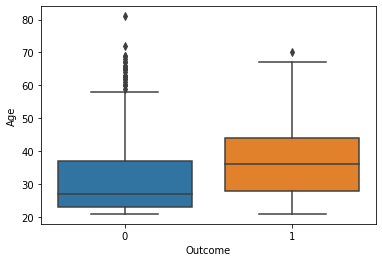

In [66]:
#diab_data.describe()

sns.boxplot(data=diab_data, x='Outcome', y='Age')
# sns.scatterplot(data=diab_data, x='Outcome', y='Age')

# Задание 8.1
Начнём с поиска дубликатов в данных. Найдите все повторяющиеся строки в данных и удалите их. Для поиска используйте все признаки в данных. Сколько записей осталось в данных?

In [67]:
# mask = sber_data.duplicated(subset=dupl_columns)
# sber_duplicates = sber_data[mask]
# print(f'Число найденных дубликатов: {sber_duplicates.shape[0]}')

mask = diab_data.duplicated()
display(f'Число найденных дубликатов: {diab_data[mask].shape[0]}')
diab_data = diab_data.drop_duplicates()
display(diab_data.shape[0])

'Число найденных дубликатов: 10'

768

# Задание 8.2
Далее найдите все неинформативные признаки в данных и избавьтесь от них. В качестве порога информативности возьмите 0.99: удалите все признаки, для которых 99 % значений повторяются или 99 % записей уникальны. В ответ запишите имена признаков, которые вы нашли (без кавычек).

In [68]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in diab_data.columns:
    #наибольшая относительная частота в признаке
    top_freq = diab_data[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diab_data[col].nunique() / diab_data[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')
        
information_diab_data = diab_data.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {information_diab_data.shape[1]}')

Gender: 100.0% одинаковых значений
Результирующее число признаков: 9


# Задание 8.3

Попробуйте найти пропуски в данных с помощью метода insull().

Спойлер: ничего не найдёте. А они есть! Просто они скрыты от наших глаз. В таблице пропуски в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI обозначены нулём, поэтому традиционные методы поиска пропусков ничего вам не покажут. Давайте это исправим!

Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI на символ пропуска. Его вы можете взять из библиотеки numpy: np.nan.

Какая доля пропусков содержится в столбце Insulin? Ответ округлите до сотых.

In [69]:
diab_data.replace(
    {
        'Glucose': 0,
        'BloodPressure': 0,
        'SkinThickness': 0,
        'Insulin': 0,
        'BMI': 0, 
    },
    np.nan,
    inplace=True)

#display(diab_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].describe())
display(diab_data['Insulin'].isnull().mean())

0.4869791666666667

# Задание 8.4

Удалите из данных признаки, где число пропусков составляет более 30 %. Сколько признаков осталось в ваших данных?

Insulin          48.697917
SkinThickness    29.557292
BloodPressure     4.557292
BMI               1.432292
Glucose           0.651042
dtype: float64

<AxesSubplot:title={'center':'Распределение пропусков в данных'}>

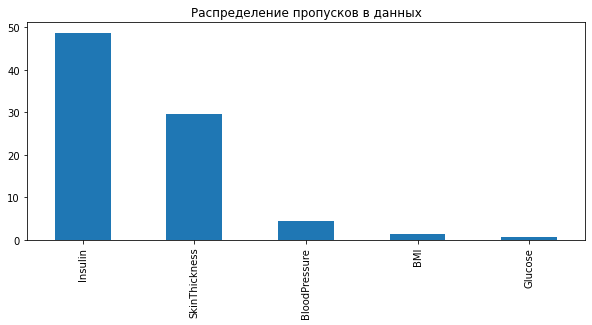

In [70]:
def show_passes(df):
    cols_null_persent = df.isnull().mean() * 100
    cols_with_null = cols_null_persent[cols_null_persent>0].sort_values(ascending=False)
    display(cols_with_null)

show_passes(diab_data)

cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
)

In [71]:
#отбрасываем столбцы с числом пропусков более 30% (100-70)
n = diab_data.shape[0] #число строк в таблице
thresh = n*0.7
diab_data.dropna(how='any', thresh=thresh, axis=1, inplace=True)
show_passes(diab_data)
diab_data.shape

SkinThickness    29.557292
BloodPressure     4.557292
BMI               1.432292
Glucose           0.651042
dtype: float64

(768, 9)

# Задание 8.5 
Удалите из данных только те строки, в которых содержится минимум два пропуска одновременно. Чему равно результирующее число записей в таблице?



In [72]:
#отбрасываем строки с числом пропусков более 2 в строке
m = diab_data.shape[1] #число признаков после удаления столбцов
diab_data.dropna(how='any', thresh=m-2, axis=0, inplace=True) 
diab_data.shape


(761, 9)

# Задание 8.6
В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце SkinThickness? Ответ округлите до десятых.


In [78]:
diab_data.fillna(
    {
        'BloodPressure': diab_data['BloodPressure'].mean(),
        'Glucose': diab_data['Glucose'].mean(),
        'BMI': diab_data['BMI'].mean(),
        'SkinThickness': diab_data['SkinThickness'].mean()
    },
    inplace=True   
)

diab_data['SkinThickness'].mean()


29.153419593345603

# Задание 8.7
Сколько выбросов найдёт классический метод межквартильного размаха в признаке SkinThickness?



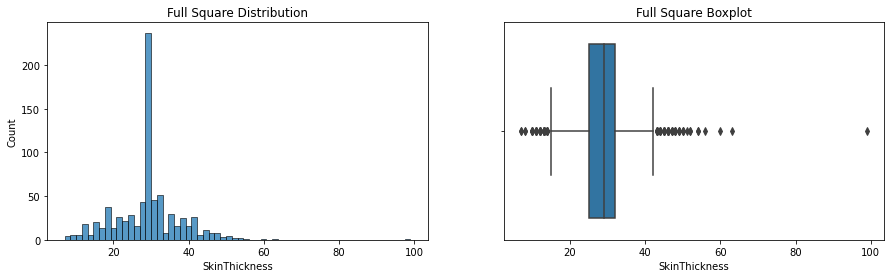

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=diab_data, x='SkinThickness', ax=axes[0]);
histplot.set_title('Full Square Distribution');
boxplot = sns.boxplot(data=diab_data, x='SkinThickness', ax=axes[1]);
boxplot.set_title('Full Square Boxplot');

In [80]:
def outliers_iqr(data, feature, log_scale=False, left=1.5, right=1.5):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(diab_data, 'SkinThickness')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 87
Результирующее число записей: 674


# Задание 8.8
Сколько выбросов найдёт классический метод z-отклонения в признаке SkinThickness?



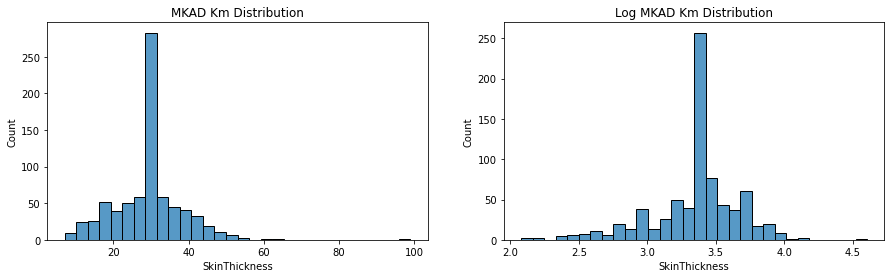

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#гистограмма исходного признака
histplot = sns.histplot(diab_data['SkinThickness'], bins=30, ax=axes[0])
histplot.set_title('MKAD Km Distribution');

#гистограмма в логарифмическом масштабе
log_mkad_km= np.log(diab_data['SkinThickness'] + 1)
histplot = sns.histplot(log_mkad_km , bins=30, ax=axes[1])
histplot.set_title('Log MKAD Km Distribution');

In [83]:
def outliers_z_score(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(diab_data, 'SkinThickness')
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 4
Результирующее число записей: 757


# Задание 8.9
На приведённой гистограмме показано распределение признака DiabetesPedigreeFunction. Такой вид распределения очень похож на логнормальный, и он заставляет задуматься о логарифмировании признака. Найдите сначала число выбросов в признаке DiabetesPedigreeFunction с помощью классического метода межквартильного размаха.

Затем найдите число выбросов в этом же признаке в логарифмическом масштабе (при логарифмировании единицу прибавлять не нужно!). Какова разница между двумя этими числами (вычтите из первого второе)?

In [87]:
outliers_without_log, cleaned = outliers_iqr(diab_data, 'DiabetesPedigreeFunction')
print(f'Число выбросов по методу Тьюки без логарифмирования: {outliers_without_log.shape[0]}')

outliers_wit_log, cleaned = outliers_iqr(diab_data, 'DiabetesPedigreeFunction', log_scale=True)
print(f'Число выбросов по методу Тьюки с логарифмированием: {outliers_wit_log.shape[0]}')

display(f'Разница = {outliers_without_log.shape[0] - outliers_wit_log.shape[0]}')

Число выбросов по методу Тьюки без логарифмирования: 29
Число выбросов по методу Тьюки с логарифмированием: 12


'Разница = 17'